# Housing Model - Multiple Factors

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random

In [3]:
# Parameters
lambda_ = 0.1  # lambda parameter for updating house values
n, m = 20, 20  # Grid size

# Define affluence values for rich, middle, and poor
affluence_levels = {
    "rich": 1.0,
    "middle": 0.5,
    "poor": 0.1
}

# Probabilities of rich, middle and poor
p = [0.1, 0.3, 0.6]

# Radius of square neighbourhood
r = 2

In [4]:
def random_board(n, m, p):
    """
    Initialize the grids with random affluence levels and house values.
    """
    affluence_grid = np.random.choice([affluence_levels["rich"], affluence_levels["middle"], affluence_levels["poor"]], size=(n, m), p=p)
    house_grid = np.zeros((n, m))  # Start with all house values as 0
    return affluence_grid, house_grid

In [5]:
def calculate_neighborhood_average(house_grid, x, y, r):
    """
    Calculate the average house value in the square neighborhood of radius r around (x, y).
    """
    n, m = house_grid.shape    
    neighborhood_sum = 0
    count = 0
    # Iterate over the neighborhood within the radius
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            # Calculate periodic indices
            neighbor_x = (x + i) % n
            neighbor_y = (y + j) % m
            
            # Add the neighbor's value to the sum
            neighborhood_sum += house_grid[neighbor_x, neighbor_y]
            count += 1

    # Calculate the average value of the neighborhood
    neighborhood_average = neighborhood_sum / count
    return neighborhood_average

In [20]:
def update_values(affluence_grid, house_grid, lambda_):
    """
    Update house values based on the affluence and neighborhood average.
    """
    new_house_grid = np.zeros_like(house_grid)
    n, m = house_grid.shape
    for x in range(n):
        for y in range(m):
            affluence = affluence_grid[x, y]
            neighborhood_avg = calculate_neighborhood_average(house_grid, x, y, r)
            new_house_grid[x, y] = affluence + lambda_ * neighborhood_avg
    return new_house_grid

In [32]:
def propose_swap(affluence_grid, house_grid):
    """
    Calculate delta and swap agents if delta > 0.
    """
    n, m = house_grid.shape
    # Choose two random houses
    x1, y1 = random.randint(0, n-1), random.randint(0, m-1)
    x2, y2 = random.randint(0, n-1), random.randint(0, m-1)

    A_x1, V_x1 = affluence_grid[x1, y1], house_grid[x1, y1]
    A_x2, V_x2 = affluence_grid[x2, y2], house_grid[x2, y2]
    
    delta = (A_x1 - V_x1)**2 + (A_x2 - V_x2)**2 - (A_x1 - V_x2)**2 - (A_x2 - V_x1)**2
    
    if delta > 0:
        # Swap the affluence levels of the two agents
        affluence_grid[x1, y1], affluence_grid[x2, y2] = A_x2, A_x1
        house_grid[x1, y1], house_grid[x2, y2] = V_x2, V_x1

In [28]:
def plot_grid(house_grid, step):
    """
    Plot the current state of the grid.
    """
    plt.imshow(house_grid, cmap='plasma', origin='upper')
    plt.title(f'Step {step}')
    plt.colorbar(label='House Value')
    plt.show()
    plt.pause(0.5)
    clear_output(wait=True)
    display(plt.gcf())

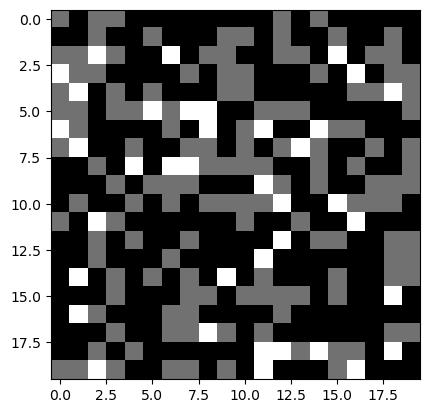

In [56]:
# Simulation parameters
n_steps = 10
affluence_grid, house_grid = random_board(n, m, p)

fig, ax = plt.subplots()
#plot_grid(house_grid,0)
img = plt.imshow(house_grid, cmap='gray')


# Simulation loop
for step in range(n_steps):
    # Update house values
    house_grid = update_values(affluence_grid, house_grid, lambda_)
    
    # Propose a random move
    propose_swap(affluence_grid, house_grid)

    #img.set_array(house_grid)
    plt.imshow(house_grid, cmap='gray')
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)

In [62]:
# Simulation parameters
n_steps = 10
affluence_grid, house_grid = random_board(n, m, p)

fig, ax = plt.subplots()
plot_grid(house_grid,0)

# Simulation loop
for step in range(n_steps):
    # Update house values
    house_grid = update_values(affluence_grid, house_grid, lambda_)
    
    # Propose a random move
    propose_swap(affluence_grid, house_grid)

    plot_grid(house_grid, step)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
k=random_board(5,5,p)
update_values(k[0], k[1], 